In [1]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters(nx, no_of_hidden_neurons):
    W1 = np.random.randn(no_of_hidden_neurons, nx) * 0.01
    b1 = np.zeros((no_of_hidden_neurons, 1))
    W2 = np.random.randn(1, no_of_hidden_neurons) * 0.01
    b2 = np.zeros((1, 1))
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache


Cost after iteration 0: 0.6537782113203494
Cost after iteration 1000: -34.255788255786264
Cost after iteration 2000: -67.66379565245703
Cost after iteration 3000: -89.98943586917794
Cost after iteration 4000: -97.5131674957279
Cost after iteration 5000: -100.60192506939848
Cost after iteration 6000: -101.7896056764422
Cost after iteration 7000: -102.02678744378653
Cost after iteration 8000: -102.04915482589921
Cost after iteration 9000: -102.0504909427197


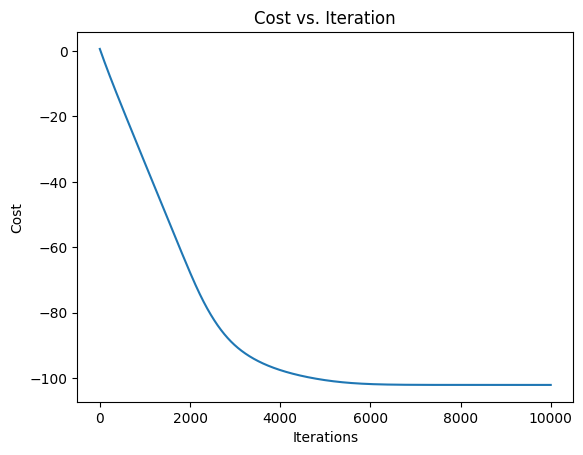

[[1.]
 [1.]]


In [10]:
# Normalize the input data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Preprocessing - add bias term to X_normalized
X_bias = np.c_[np.ones((len(X_normalized), 1)), X_normalized]

# Initialize parameters and hyperparameters
theta = initialize_parameters(X_bias.shape[1])
learning_rate = 0.001  # Adjusted learning rate
num_iterations = 10000



# Define epsilon value
epsilon = 1e-8

# Define sigmoid function with epsilon
def sigmoid(z):
    return 1 / (1 + np.exp(-z + epsilon))

# Compute the cost function with epsilon
def compute_cost(X, Y, theta):
    m = len(Y)
    h = sigmoid(X.dot(theta))
    cost = -1/m * np.sum(Y * np.log(h + epsilon) + (1 - Y) * np.log(1 - h + epsilon))
    return cost

# Perform gradient descent with epsilon
def gradient_descent(X, Y, theta, learning_rate, num_iterations):
    m = len(Y)
    costs = []
    
    for i in range(num_iterations):
        h = sigmoid(X.dot(theta))
        gradient = 1/m * X.T.dot(h - Y)
        theta -= learning_rate * gradient
        
        cost = compute_cost(X, Y, theta)
        costs.append(cost)
        
        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
    
    return theta, costs

# Re-run the code with epsilon included
theta_optimized, costs = gradient_descent(X_bias, Y, theta, learning_rate, num_iterations)

# Plotting the cost vs. iteration curve
plt.plot(range(len(costs)), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.show()


# Example prediction using the optimized parameters
X_new = np.array([[0], [2]])
X_new_normalized = (X_new - X_mean) / X_std
X_new_bias = np.c_[np.ones((len(X_new_normalized), 1)), X_new_normalized]
predictions = sigmoid(X_new_bias.dot(theta_optimized))
print(predictions)
